## Violin 

### summary data

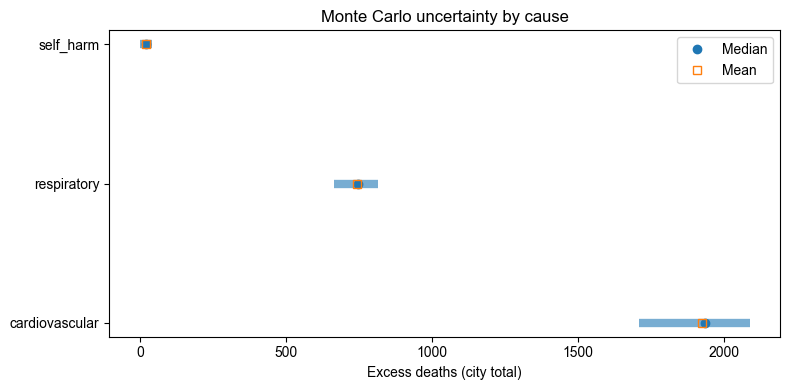

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams['font.family'] = 'Arial'

dir_fig = Path(r'D:\natcap\urban-cooling-health\figures')

dir_data = Path("G:/Shared drives/Wellcome Trust Project Data/2_postprocess_intermediate/UCM_official_runs/health_output_s0_s3")
mc_path = dir_data / "city_totals_monte_carlo.csv" 
df = pd.read_csv(mc_path)

# Melt to a long form if your CSV stores one row per cause (summary only).
# If you have only summary stats (no per-draw values), plot percentile bars:
fig, ax = plt.subplots(figsize=(8, 4))

causes = df['cause'].tolist()
p2 = df['excess_p2p5'].values
p50 = df['excess_p50'].values
p97 = df['excess_p97p5'].values
mean = df['excess_mean'].values

y = np.arange(len(causes))
ax.hlines(y, p2, p97, linewidth=6, alpha=0.6)            # 95% interval
ax.plot(p50, y, 'o', label='Median')
ax.plot(mean, y, 's', mfc='none', label='Mean')

ax.set_yticks(y)
ax.set_yticklabels(causes)
ax.set_xlabel("Excess deaths (city total)")
ax.set_title("Monte Carlo uncertainty by cause")
ax.legend(loc='best')
plt.tight_layout()
plt.show()


### detailed data

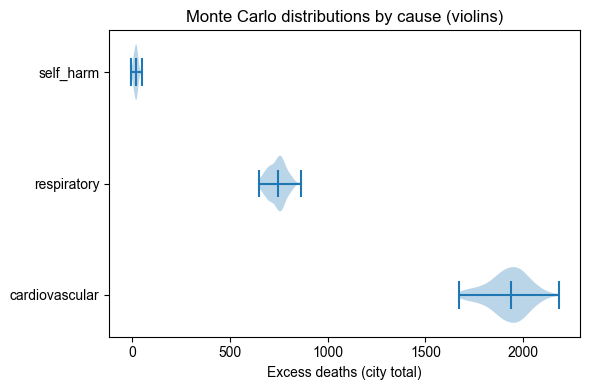

In [2]:
# Suppose df_draws has columns ['draw', 'cardiovascular', 'respiratory', 'cerebrovascular']
f_draws = dir_data / "city_total_draws_by_cause.csv"
df_draws = pd.read_csv(f_draws)  # shape: n_draws x causes
causes = [c for c in df_draws.columns if c != 'draw']
data = [df_draws[c].dropna().values for c in causes]

fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.violinplot(dataset=data, showmeans=False, showmedians=True, vert=False)

ax.set_yticks(np.arange(1, len(causes)+1))
ax.set_yticklabels(causes)
ax.set_xlabel("Excess deaths (city total)")
ax.set_title("Monte Carlo distributions by cause (violins)")
plt.tight_layout()
plt.show()


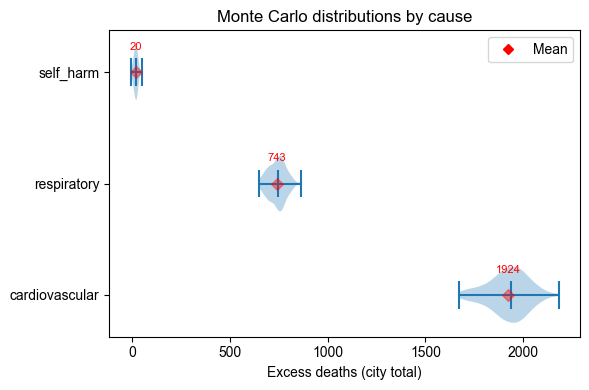

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

dir_data = Path(dir_data)  # ensure Path
f_draws = dir_data / "city_total_draws_by_cause.csv"

df_draws = pd.read_csv(f_draws)  # shape: n_draws x causes
causes = [c for c in df_draws.columns if c != 'draw']
data = [df_draws[c].dropna().values for c in causes]

# ----- precompute summary stats per cause -----
data_arr = [np.asarray(d, dtype=float) for d in data]
means   = np.array([np.nanmean(d) for d in data_arr])
medians = np.array([np.nanmedian(d) for d in data_arr])
p25     = np.array([np.nanpercentile(d, 25) for d in data_arr])
p75     = np.array([np.nanpercentile(d, 75) for d in data_arr])
p2      = np.array([np.nanpercentile(d, 2.5) for d in data_arr])
p97     = np.array([np.nanpercentile(d, 97.5) for d in data_arr])

# ----- plot -----
fig, ax = plt.subplots(figsize=(6, 4))

# violins (horizontal), with medians drawn by matplotlib
parts = ax.violinplot(dataset=data_arr, showmeans=False, showmedians=True, vert=False)

ys = np.arange(1, len(causes) + 1)

# # 95% interval (thin bar)
# for y, lo, hi in zip(ys, p2, p97):
#     ax.hlines(y, lo, hi, linewidth=3, color = 'gray', alpha=0.9)

# # IQR (thick bar)
# for y, lo, hi in zip(ys, p25, p75):
#     ax.hlines(y, lo, hi, linewidth=6, alpha=0.6)

# Means (diamond) and Medians (tick)
ax.scatter(means, ys, marker='D', s=36, color="red", alpha=0.4, zorder=3, label="Mean") 
# s=36 means the marker is 6 points by 6 points, higher zorder = drawn on top of lower ones
# ax.scatter(medians, ys, marker='|', s=200, color="orange", zorder=3, label="Median")


# add text labels for means
for x, y in zip(means, ys):
    # slightly above the marker
    # formatted to 1 decimal place
    ax.text(x, y + 0.2, f"{x:.0f}", color="red", fontsize=8, ha="center")


# axes / labels
ax.set_yticks(ys)
ax.set_yticklabels(causes)
ax.set_xlabel("Excess deaths (city total)")
ax.set_title("Monte Carlo distributions by cause")

# Legend (use proxy handles for the bars so labels are clear)
legend_handles = [
    # Line2D([0], [0], lw=6, alpha=0.6, label="IQR (25–75%)"),
    # Line2D([0], [0], lw=2, alpha=0.9, label="95% interval (2.5–97.5%)"),
    Line2D([0], [0], marker='D', linestyle='None', markersize=5, color="red", label="Mean"),
    # Line2D([0], [0], marker='|', linestyle='None', markersize=12, label="Median"),
]
ax.legend(handles=legend_handles, loc="best")

plt.tight_layout()

fig.savefig(dir_fig / "health_monte_carlo_violins_by_cause.png", dpi=300)

plt.show()


## ECDF

ECDF (cumulative probability) curves—great for reading off percentiles

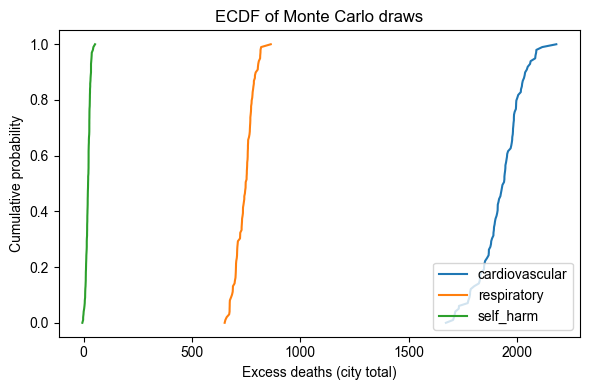

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_draws = pd.read_csv(f_draws)
causes = [c for c in df_draws.columns if c != 'draw']

fig, ax = plt.subplots(figsize=(6,4))
for c in causes:
    x = np.sort(df_draws[c].dropna().values)
    y = np.linspace(0, 1, x.size, endpoint=True)
    ax.plot(x, y, label=c)

ax.set_xlabel("Excess deaths (city total)")
ax.set_ylabel("Cumulative probability")
ax.set_title("ECDF of Monte Carlo draws")
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()
